In [63]:
import networkx as nx
import pandas as pd
import numpy as np

In [64]:
infection_data_file= 'infection.xlsx'
infection_data = pd.read_excel(infection_data_file,sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [65]:
node_shape = {'Human':"circle", 'Car':"box",'Place':"ellipse"}
node_shape['Human']

'circle'

In [66]:
infection_data.columns


Index(['Incidence_number', 'Identification_number', 'Sanitized',
       'Infected_Flag', 'Entity_Flag', 'confirm_Date', 'Contacted', 'Phone',
       'Monitored_Till', 'cluster', 'Remarks'],
      dtype='object')

0    H1
Name: Identification_number, dtype: object

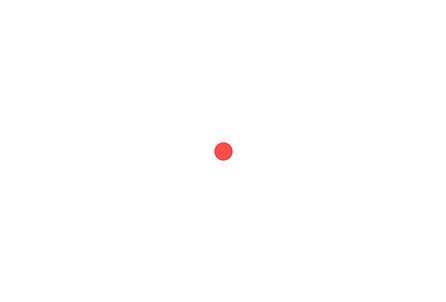

In [68]:
# first case is detected
G = nx.from_pandas_edgelist(infection_data[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
infection_data['color'] = np.where(infection_data['Infected_Flag']=='Yes', 'r', 'y')
color_dct = infection_data[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G.nodes()]
nx.draw(G, node_color=values,label=True, alpha = 0.7)


In [175]:
infection_data = pd.read_excel(infection_data_file,sheet_name=1,
header=0,
index_col=False,
keep_default_na=True
)

In [176]:
infection_data['color'] = np.where(infection_data['Infected_Flag']=='Yes', 'r','y')

In [177]:
# first case is detected
G1 = nx.from_pandas_edgelist(infection_data[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
d = dict(G1.degree())
color_dct = infection_data[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G1.nodes()]
#nx.draw_kamada_kawai(G1, node_size=[v * 200 for v in d.values()], node_color=values,label=True, alpha = 0.7  )


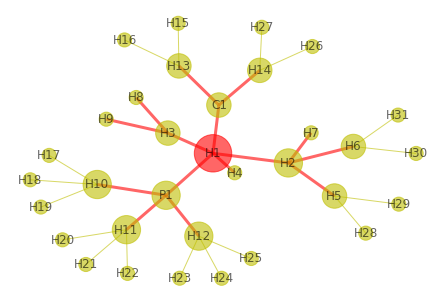

In [178]:
# generate a list of nodes which are red
inf_list = infection_data[infection_data['Infected_Flag'] == 'Yes']['Identification_number'].tolist()

def plot_infection(inf_list,G1):
    l1 = [y for (x,y) in G1.edges() if x in inf_list ]
    l3 = l1[1:]
    edge_list_weight = {}
    edge_color = {}

    for (x,y) in G1.edges():

        if x  in ['H1','H2']:
            edge_list_weight[(x,y)]='3'
        elif x in l3:
            edge_list_weight[(x,y)]='3'
        else:
            edge_list_weight[(x,y)]='1'

    for (x,y) in G1.edges():

        if x  in ['H1','H2']:
            edge_color[(x,y)]='r'
        elif x in l3:
            edge_color[(x,y)]='r'
        else:
            edge_color[(x,y)]='y'


    width_values = [edge_list_weight.get(edge) for edge in G1.edges()]
    color_values = [edge_color.get(edge) for edge in G1.edges()]

    nx.draw_kamada_kawai(G1, node_size=[v * 200 for v in d.values()], node_color=values,with_labels=True, alpha=0.6, edge_color = color_values,width= width_values)

    
plot_infection(inf_list,G1)











In [179]:
def suspect_cases(case_name,dataframe):
    lst = [y for (x,y) in G1.edges() if x in case_name]
    
    suspect_list = []
    
    for (x,y) in G1.edges():
        if x in lst:
            suspect_list.append(y)
    
    suspect_list = suspect_list+lst
            
    
    dataf = dataframe[dataframe.Identification_number.isin(suspect_list)]   
    return dataf   

dataf = suspect_cases(inf_list,infection_data_2)
dataf

,Incidence_number,Identification_number,Sanitized,Infected_Flag,Entity_Flag,confirm_Date,Contacted,Phone,Monitored_Till,Remarks,color
0,1,H1,NaN,Yes,Human,2019-12-15,H1,#1,NaT,NaN,r
1,2,C1,Yes,No,Car,2019-12-14,H1,#2,2019-12-28,NaN,y
2,3,H2,NaN,No,Human,2019-12-14,H1,#3,2019-12-28,NaN,y
3,4,P1,Yes,No,Place,2019-12-14,H1,#4,2019-12-28,NaN,y
4,5,H10,NaN,No,Human,2019-12-14,P1,#11,2019-12-28,NaN,y
5,6,H11,NaN,No,Human,2019-12-14,P1,#12,2019-12-28,NaN,y
6,7,H12,NaN,No,Human,2019-12-14,P1,#13,2019-12-28,NaN,y
7,8,H3,NaN,No,Human,2019-12-14,H1,#5,2019-12-28,NaN,y
8,9,H4,NaN,No,Human,2019-12-15,H1,#2,2019-12-29,C1,y
9,10,H13,NaN,No,Human,2019-12-14,C1,#14,2019-12-28,NaN,y


In [180]:
infection_data = pd.read_excel(infection_data_file,sheet_name=2,
header=0,
index_col=False,
keep_default_na=True
)
infection_data['color'] = np.where(infection_data['Infected_Flag']=='Yes', 'r','y')

# first case is detected
G1 = nx.from_pandas_edgelist(infection_data[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
d = dict(G1.degree())
color_dct = infection_data[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G1.nodes()]
#nx.draw_kamada_kawai(G1, node_size=[v * 200 for v in d.values()], node_color=values,label=True, alpha = 0.7  )


['H1', 'H2']


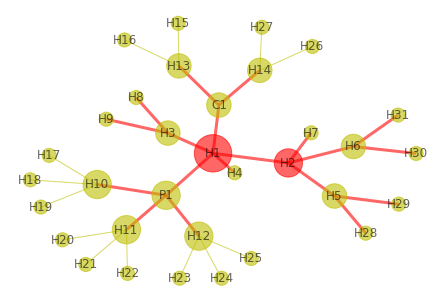

In [181]:
inf_list = infection_data[infection_data['Infected_Flag'] == 'Yes']['Identification_number'].tolist()
print(inf_list)
dataf = suspect_cases(inf_list,infection_data)
plot_infection(inf_list,G1)